# Analysis of Differentially Expressed Genes after Stress treatment (MV vs PE)

_Author :_ Natalia Garcia Sánchez

_Date :_ 20/02/2023

_Description :_ Analysis of Differentially Expressed Genes (DEGs) related with **Autophagy**, **oxidative stress**, **miRNA regulation** in Microspore Embryogenesis (ME)

---

**Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as vplt

**Importing annotations of genes within the genome**

We can obtain the annotations of these genes in `Id_annotations_gene.csv` file, which is obtained from the GTF annotation file using these commands in bash
```
echo "gene_id,gene_name,gene_source,gene_biotype,gene_description" >Id_annotations_genome.csv
cat genome.gtf | grep -P "\tgene\t" | cut -f9 | sed 's/gene_id\s//g' | sed 's/gene_name\s//g' | sed 's/gene_source\s//g' | sed 's/gene_biotype\s//g' | sed 's/;\s/,/g' | sed 's/;//g' >>Id_annotations_genome.csv

```

In [3]:
annotated_gtf = pd.read_csv('./Id_annotations_genome.csv')

In [4]:
list(set(annotated_gtf['gene_biotype']))

['tRNA',
 'pre_miRNA',
 'snRNA',
 'RNase_MRP_RNA',
 'protein_coding',
 'SRP_RNA',
 'sense_intronic',
 'rRNA',
 'snoRNA',
 'antisense_RNA']

In [16]:
annotated_gtf.head()

,gene_id,gene_name,gene_source,gene_biotype
0,GSBRNA2T00098480001,BnaA07g14370D,ena,protein_coding
1,GSBRNA2T00098481001,BnaA07g14380D,ena,protein_coding
2,GSBRNA2T00098482001,BnaA07g14390D,ena,protein_coding
3,GSBRNA2T00098483001,BnaA07g14400D,ena,protein_coding
4,GSBRNA2T00098484001,BnaA07g14410D,ena,protein_coding


**Importing data about annotated autophagy related (ATG) genes**

Source : *In Silico Analyses of Autophagy-Related Genes in Rapeseed (Brassica napus L.) under Different Abiotic Stresses and in Various Tissues (2020) (doi: 10.3390/plants9101393)*

In [17]:
df_ATG = pd.read_csv('./ATG_genes.tsv', sep = "\t")

In [18]:
df_ATG.head()

,Gene\tName,Locus,Chromosome,Start,End,Strand,Length,MW,pI
0,BnATG1a,GSBRNA2T00124896001,chrA03,8190848,8194622,+,716,79.13,6.4
1,BnATG1b,GSBRNA2T00126489001,chrA04,3297987,3302544,-,713,79.20,8.3
2,BnATG1c,GSBRNA2T00099071001,chrA07,15415971,15419120,-,606,67.28,6.4
3,BnATG1d,GSBRNA2T00091067001,chrA08,2278450,2280614,+,268,30.62,7.7
4,BnATG1e,GSBRNA2T00049446001,chrA09,28022400,28025991,-,587,65.22,6.2


**Importing data about annotated ROS genes in _Brassica napus L._**

Source : 

In [4]:
df_os = pd.read_csv('./OS_genes.csv')

In [5]:
df_os.rename(columns={'Gen':'gene_name', 'Gen ID':'gene_id'}, inplace=True)

In [29]:
df_os.shape

(2289, 2)

**Importing data about annotated miRNA genes in _ME_**

Source : 

In [34]:
df_mirna = pd.read_csv('./ncRNA_genes_interest.tsv', sep = "\t")

In [36]:
list(set(df_mirna['gene_biotype']))

['antisense_RNA', 'pre_miRNA']

In [7]:
df_mirna.head()

,gene_id,gene_biotype
0,ENSRNA049445106,pre_miRNA
1,ENSRNA049445117,pre_miRNA
2,ENSRNA049445137,pre_miRNA
3,ENSRNA049445216,pre_miRNA
4,ENSRNA049445498,pre_miRNA


**Importing ALL DEGs data obtained from DeSeq2 BH testing with GLM (Generalized Binomial Model)**



In [5]:
df_all = pd.read_csv('./analyses-Nv-Sara/MVvsPE_ss.csv')

In [294]:
# Drop index
df_all.drop(df_all.columns[0], axis=1, inplace=True)
df_all.head()

,ensembl_gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,description,transcript_length,sig
0,ENSRNA049434328,5.754965,4.274690,1.358848,3.145819,1.656222e-03,3.171013e-03,tRNA-Ala for anticodon CGC,73,yes
1,ENSRNA049444545,17.743753,8.435966,1.447757,5.826922,5.645904e-09,1.958701e-08,tRNA-Leu for anticodon AAG,81,yes
2,ENSRNA049445564,39.255182,0.899179,0.401881,2.237426,2.525854e-02,3.955385e-02,Eukaryotic small subunit ribosomal RNA,945,yes
3,ENSRNA049445587,3.900645,6.269266,1.836784,3.413176,6.421049e-04,1.308855e-03,Eukaryotic large subunit ribosomal RNA,336,yes
4,ENSRNA049445844,209.370786,3.362536,0.244411,13.757715,4.577650e-43,9.481695e-42,Eukaryotic small subunit ribosomal RNA,677,yes


**Importing UP-regulated DEGs data obtained from DeSeq2 BH testing with GLM (Generalized Binomial Model)**

In [6]:
df_up = df_all[df_all['log2FoldChange']>0]

df_down = df_all[df_all['log2FoldChange']<0]**Importing DOWN-regulated DEGs data obtained from DeSeq2 BH testing with GLM (Generalized Binomial Model)**

In [7]:
df_down = df_all[df_all['log2FoldChange']<0]

In [302]:
df_down.head()

,gene_id,Trep1,Trep2,Trep3,Crep1,Crep2,Crep3,T,C,log2FoldChange,...,Trep3_count,Crep1_count,Crep2_count,Crep3_count,Trep1_fpkm,Trep2_fpkm,Trep3_fpkm,Crep1_fpkm,Crep2_fpkm,Crep3_fpkm
1049,GSBRNA2T00021507001,318.528768,333.089727,294.841128,723.658236,447.194592,722.635071,315.486541,631.162633,-1.000309,...,338,694,412,656,7.034337,7.355899,6.511223,15.981150,9.875772,15.958554
959,GSBRNA2T00155400001,258.486604,216.931415,239.013222,544.307780,476.501034,406.482227,238.143747,475.763680,-1.000367,...,274,522,439,369,2.006667,1.684069,1.855493,4.225537,3.699144,3.155578
1457,GSBRNA2T00140948001,169.949854,129.235737,147.420564,351.401766,271.355942,268.784996,148.868718,297.180901,-1.000379,...,169,337,250,244,1.273388,0.968328,1.104582,2.632959,2.033197,2.013933
1969,GSBRNA2T00004487001,309.369794,127.697216,176.206828,485.914608,346.250182,391.060137,204.424613,407.741642,-1.000982,...,202,466,319,355,2.052022,0.847004,1.168764,3.223027,2.296646,2.593866
2371,GSBRNA2T00119712001,100.748716,102.311625,88.975725,148.068400,271.355942,165.236678,97.345355,194.887006,-1.001145,...,102,142,250,150,1.940028,1.970123,1.713326,2.851220,5.225258,3.181815


## Venn plots

In [304]:
UP_geneset = df_up['ensembl_gene_id'].values.tolist()
DOWN_geneset = df_down['ensembl_gene_id'].values.tolist()

### 1. ATG genes

In [305]:
ATG_geneset = df_ATG['Locus'].values.tolist()

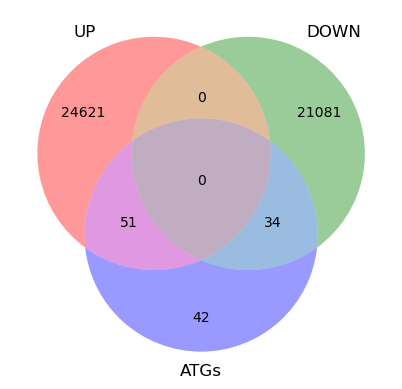

In [306]:
from matplotlib_venn import venn3, venn3_unweighted

set1 = set(UP_geneset)
set2 = set(DOWN_geneset)
set3 = set(ATG_geneset)

venn3_unweighted([set1, set2, set3], ('UP', 'DOWN', 'ATGs'), subset_label_formatter=None)
plt.savefig('./analyses-Nv-Sara/ATG_DEG_venn.svg')
plt.show()

### 2. Oxidative stress genes

In [307]:
os_geneset = df_os['gene_id'].values.tolist()

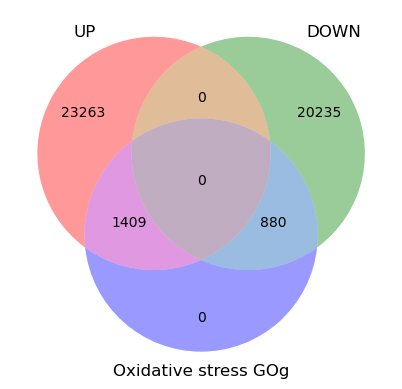

In [308]:
from matplotlib_venn import venn3, venn3_unweighted

set1 = set(UP_geneset)
set2 = set(DOWN_geneset)
set3 = set(os_geneset)

venn3_unweighted([set1, set2, set3], ('UP', 'DOWN', 'Oxidative stress GOg'), subset_label_formatter=None)
plt.savefig('./analyses-Nv-Sara/OS_DEG_venn.svg')
plt.show()

### 3. miRNA

In [309]:
miRNA_geneset = df_mirna['gene_id'].values.tolist()

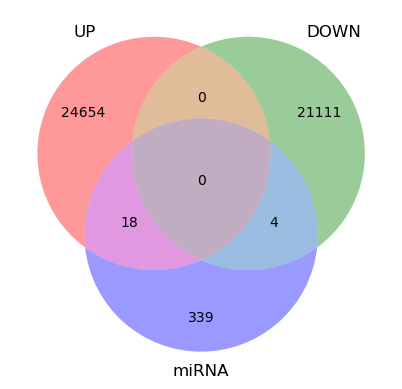

In [310]:
from matplotlib_venn import venn3, venn3_unweighted

set1 = set(UP_geneset)
set2 = set(DOWN_geneset)
set3 = set(miRNA_geneset)

venn3_unweighted([set1, set2, set3], ('UP', 'DOWN', 'miRNA'), subset_label_formatter=None)
plt.savefig('./analyses-Nv-Sara/miRNA_DEG_venn.svg')
plt.show()

In [41]:
df_all.rename(columns={'ensembl_gene_id':'gene_id'}, inplace=True)

In [50]:
pd.merge(df_all, df_mirna, how="inner", on="gene_id").sort_values('log2FoldChange', ascending=False).drop(df_all.columns[0], axis=1).to_csv('./analyses-Nv-Sara/miRNA_DEG_sara.csv', index=False)

# Analyzing Novogene Results

In [313]:
df_up = pd.read_table('./analyses-Novogene/data/MVvsPE/up_DEG.xls')

In [280]:
list(set(df_up['gene_biotype']))

['pre_miRNA',
 'rRNA',
 'sense_intronic',
 'protein_coding',
 'SRP_RNA',
 'snRNA',
 'snoRNA',
 'tRNA']

In [314]:
df_down = pd.read_table('./analyses-Novogene/data/MVvsPE/down_DEG.xls')

In [282]:
df_up.head()

,gene_id,PErep1,PErep2,PErep3,VMrep1,VMrep2,VMrep3,PE,VM,log2FoldChange,...,PErep3_count,VMrep1_count,VMrep2_count,VMrep3_count,PErep1_fpkm,PErep2_fpkm,PErep3_fpkm,VMrep1_fpkm,VMrep2_fpkm,VMrep3_fpkm
0,GSBRNA2T00045445001,2303.465820,2915.732816,2639.060804,50.365253,39.442108,40.057633,2619.419813,43.288331,5.919839,...,3130,70,58,55,76.809994,97.226283,88.000544,1.679450,1.315213,1.335738
1,GSBRNA2T00022730001,1754.825879,1913.677566,2271.447223,26.621634,17.680945,22.577939,1979.983556,22.293506,6.475078,...,2694,37,26,31,22.932382,25.008285,29.683683,0.347896,0.231058,0.295053
2,GSBRNA2T00007206001,10921.428039,6587.018207,12535.960396,2.878014,1.360073,2.184962,10014.802214,2.141016,12.198384,...,14868,4,2,3,569.421414,343.433955,653.599902,0.150054,0.070911,0.113920
3,GSBRNA2T00065303001,1820.580478,1409.003452,2149.190412,18.707094,21.761163,16.751374,1792.924781,19.073210,6.553568,...,2549,26,32,23,100.261832,77.595728,118.358826,1.030225,1.198417,0.922521
4,GSBRNA2T00138625001,2385.659069,1302.525965,2093.542485,9.353547,8.160436,8.739847,1927.242506,8.751277,7.783383,...,2483,13,12,12,59.728707,32.610775,52.415111,0.234181,0.204309,0.218816


In [283]:
UP_geneset = df_up['gene_id'].values.tolist()
DOWN_geneset = df_down['gene_id'].values.tolist()

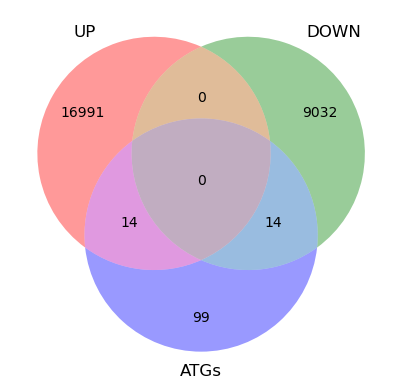

In [284]:
from matplotlib_venn import venn3, venn3_unweighted

set1 = set(UP_geneset)
set2 = set(DOWN_geneset)
set3 = set(ATG_geneset)


venn3_unweighted([set1, set2, set3], ('UP', 'DOWN', 'ATGs'), subset_label_formatter=None)
plt.savefig('./analyses-Novogene/data/MVvsPE/ATG_DEG_venn.svg')
plt.show()

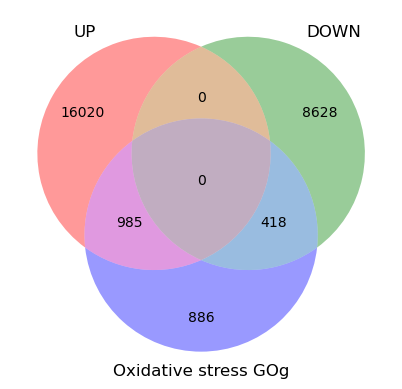

In [285]:
from matplotlib_venn import venn3, venn3_unweighted

set1 = set(UP_geneset)
set2 = set(DOWN_geneset)
set3 = set(os_geneset)

venn3_unweighted([set1, set2, set3], ('UP', 'DOWN', 'Oxidative stress GOg'), subset_label_formatter=None)
plt.savefig('./analyses-Novogene/data/MVvsPE/OS_DEG_venn.svg')
plt.show()

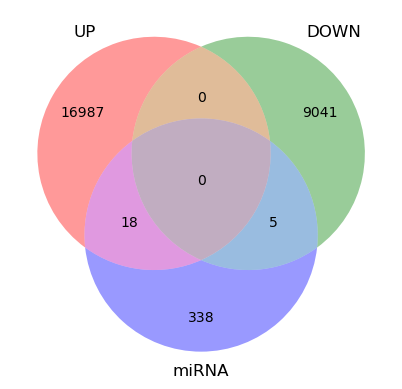

In [286]:
from matplotlib_venn import venn3, venn3_unweighted

set1 = set(UP_geneset)
set2 = set(DOWN_geneset)
set3 = set(miRNA_geneset)

venn3_unweighted([set1, set2, set3], ('UP', 'DOWN', 'miRNA'), subset_label_formatter=None)
plt.savefig('./analyses-Novogene/data/MVvsPE/miRNA_DEG_venn.svg')
plt.show()

In [287]:
df_all = pd.concat((df_up, df_down), axis=0)

In [288]:
df_all

,gene_id,PErep1,PErep2,PErep3,VMrep1,VMrep2,VMrep3,PE,VM,log2FoldChange,...,PErep3_count,VMrep1_count,VMrep2_count,VMrep3_count,PErep1_fpkm,PErep2_fpkm,PErep3_fpkm,VMrep1_fpkm,VMrep2_fpkm,VMrep3_fpkm
0,GSBRNA2T00045445001,2303.465820,2915.732816,2639.060804,50.365253,39.442108,40.057633,2619.419813,43.288331,5.919839,...,3130,70,58,55,76.809994,97.226283,88.000544,1.679450,1.315213,1.335738
1,GSBRNA2T00022730001,1754.825879,1913.677566,2271.447223,26.621634,17.680945,22.577939,1979.983556,22.293506,6.475078,...,2694,37,26,31,22.932382,25.008285,29.683683,0.347896,0.231058,0.295053
2,GSBRNA2T00007206001,10921.428039,6587.018207,12535.960396,2.878014,1.360073,2.184962,10014.802214,2.141016,12.198384,...,14868,4,2,3,569.421414,343.433955,653.599902,0.150054,0.070911,0.113920
3,GSBRNA2T00065303001,1820.580478,1409.003452,2149.190412,18.707094,21.761163,16.751374,1792.924781,19.073210,6.553568,...,2549,26,32,23,100.261832,77.595728,118.358826,1.030225,1.198417,0.922521
4,GSBRNA2T00138625001,2385.659069,1302.525965,2093.542485,9.353547,8.160436,8.739847,1927.242506,8.751277,7.783383,...,2483,13,12,12,59.728707,32.610775,52.415111,0.234181,0.204309,0.218816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9041,GSBRNA2T00099601001,30.822469,30.630510,109.609554,162.607817,173.409269,166.057097,57.020844,167.358061,-1.531466,...,130,226,255,228,0.499619,0.496507,1.776724,2.635803,2.810890,2.691714
9042,GSBRNA2T00037145001,653.436334,662.202450,2026.090451,2669.358405,3079.884620,3023.258810,1113.909745,2924.167278,-1.391131,...,2403,3710,4529,4151,21.183845,21.468035,65.684112,86.538306,99.847214,98.011454
9043,GSBRNA2T00104568001,2.054831,4.375787,0.843150,12.231561,19.041018,6.554885,2.424590,12.609155,-2.465132,...,1,17,28,9,0.060012,0.127796,0.024624,0.357227,0.556099,0.191437
9044,GSBRNA2T00111660001,80.138418,51.050850,108.766404,138.144694,155.048287,225.051065,79.985224,172.748015,-1.102545,...,129,192,228,309,1.785423,1.137374,2.423232,3.077758,3.454357,5.013965


In [289]:
nv_miRNA_DEG = pd.merge(df_all, df_mirna, how="inner", on="gene_id").sort_values('log2FoldChange', ascending=False)
nv_miRNA_DEG

,gene_id,PErep1,PErep2,PErep3,VMrep1,VMrep2,VMrep3,PE,VM,log2FoldChange,...,VMrep1_count,VMrep2_count,VMrep3_count,PErep1_fpkm,PErep2_fpkm,PErep3_fpkm,VMrep1_fpkm,VMrep2_fpkm,VMrep3_fpkm,gene_biotype_y
0,ENSRNA049469314,351.376142,338.394204,1.686301,0.719504,0.000000,0.000000,230.485549,0.239835,9.824547,...,1,0,0,125.438455,120.804007,0.601996,0.256857,0.000000,0.000000,pre_miRNA
1,ENSRNA049472766,117.125381,71.471190,2.529451,0.000000,0.000000,0.000000,63.708674,0.000000,8.927459,...,0,0,0,29.617413,18.072870,0.639621,0.000000,0.000000,0.000000,pre_miRNA
2,ENSRNA049477262,110.960887,65.636807,2.529451,0.000000,0.000000,0.000000,59.709048,0.000000,8.833508,...,0,0,0,30.062788,17.783071,0.685308,0.000000,0.000000,0.000000,pre_miRNA
6,ENSRNA049470603,117.125381,176.490080,0.000000,0.000000,0.000000,0.728321,97.871820,0.242774,8.588560,...,0,0,1,41.812818,63.005538,0.000000,0.000000,0.000000,0.260005,pre_miRNA
7,ENSRNA049462925,4.109662,1.458596,59.020529,0.000000,0.000000,0.000000,21.529596,0.000000,7.380515,...,0,0,0,1.222597,0.433922,17.558212,0.000000,0.000000,0.000000,pre_miRNA
13,ENSRNA049469710,45.206287,18.961744,0.000000,0.000000,0.000000,0.000000,21.389344,0.000000,7.350182,...,0,0,0,13.856100,5.811931,0.000000,0.000000,0.000000,0.000000,pre_miRNA
8,ENSRNA049464999,22.603144,13.127361,0.843150,0.000000,0.000000,0.000000,12.191218,0.000000,6.526188,...,0,0,0,5.812516,3.375769,0.216821,0.000000,0.000000,0.000000,pre_miRNA
9,ENSRNA049460031,2.054831,4.375787,22.765061,0.000000,0.000000,0.000000,9.731893,0.000000,6.251852,...,0,0,0,0.611299,1.301767,6.772453,0.000000,0.000000,0.000000,pre_miRNA
15,ENSRNA049446340,26.712806,1.458596,0.843150,0.000000,0.000000,0.000000,9.671517,0.000000,6.186776,...,0,0,0,4.221780,0.230521,0.133254,0.000000,0.000000,0.000000,pre_miRNA
3,ENSRNA049475980,131.509199,129.815018,7.588354,0.000000,3.400182,0.728321,89.637524,1.376167,6.008591,...,0,5,1,28.917078,28.544550,1.668575,0.000000,0.747654,0.160148,pre_miRNA


In [290]:
nv_miRNA_DEG.to_csv('./analyses-Novogene/data/MVvsPE/miRNA_DEG.csv', index=False)

---

## Merging and analyzing expression levels

### 1. ATG genes

merging ATG genes with DEG results.

In [331]:
df_tomerge = pd.DataFrame()
df_tomerge['gene_id'] = df_ATG['Locus']

reading up and down regulated genes

In [340]:
df_ATG_up = df_up.merge(df_tomerge, how='inner')
#df_ATG_up = df_ATG_up.sort_values('log2FoldChange', ascending=False)

In [341]:
df_ATG_down = df_down.merge(df_tomerge, how='inner')
#df_ATG_down = df_ATG_down.sort_values('log2FoldChange')

Adding type of fold change

In [334]:
df_ATG_up['signal']=['+' for i in range(df_ATG_up.shape[0])]
df_ATG_down['signal']=['-' for i in range(df_ATG_down.shape[0])]

merging both dataframes

In [335]:
#ATG_DEG = pd.merge(df_tomerge, df_all, how='inner')
ATG_DEG = pd.concat((df_ATG_up, df_ATG_down), axis=0)

making a colordict mapping treatments across samples

In [336]:
lut = dict(zip(["Proembryo", "Microsp vacuolated"], "rbg"))
lut


{'Proembryo': 'r', 'Microsp vacuolated': 'b'}

In [337]:
sample_order = ["Proembryo", "Proembryo", "Microsp vacuolated", "Microsp vacuolated", "Microsp vacuolated"]
col_colors = [*map(lut.get, sample_order)]

making a colordict mapping type of differential expression (UP:+, DOWN:-) across instances of DEG

In [338]:
lut_s = dict(zip(["+", "-"], ['b','g']))
lut_s

{'+': 'b', '-': 'g'}

In [339]:
row_signal = ATG_DEG.signal.tolist()
row_colors = [*map(lut_s.get, row_signal)]

In [97]:
ATG_DEG.head()

,gene_id,PErep1,PErep2,PErep3,VMrep1,VMrep2,VMrep3,PE,VM,log2FoldChange,...,VMrep1_count,VMrep2_count,VMrep3_count,PErep1_fpkm,PErep2_fpkm,PErep3_fpkm,VMrep1_fpkm,VMrep2_fpkm,VMrep3_fpkm,signal
gene_name,,,,,,,,,,,,,,,,,,,,,
BnaC05g45400D,GSBRNA2T00120086001,184.934812,211.496377,5.902053,3.597518,8.840473,13.109771,134.111081,8.515920,3.974259,...,5,13,18,8.489743,9.709097,0.270944,0.165150,0.405837,0.601826,+
BnaA07g38000D,GSBRNA2T00018013001,88.357743,138.566592,20.235610,12.231561,3.400182,2.184962,82.386648,5.938902,3.790826,...,17,5,3,3.723827,5.839873,0.852827,0.515498,0.143300,0.092085,+
BnaA03g29430D,GSBRNA2T00111859001,791.110027,824.106574,46.373273,46.048231,45.562435,54.624045,553.863291,48.744904,3.505195,...,64,67,75,36.649912,38.178550,2.148344,2.133286,2.110780,2.530579,+
BnaC03g34720D,GSBRNA2T00125305001,1247.282563,1047.271717,73.354086,90.657455,98.605270,101.964884,789.302789,97.075870,3.022528,...,126,145,140,56.658587,47.572970,3.332155,4.118171,4.479206,4.631818,+
BnaA05g30920D,GSBRNA2T00027077001,55.480443,62.719615,16.019858,7.195036,4.760254,5.826565,44.739972,5.927285,2.900961,...,10,7,8,2.554653,2.887988,0.737650,0.331303,0.219191,0.268290,+


<Figure size 640x480 with 0 Axes>

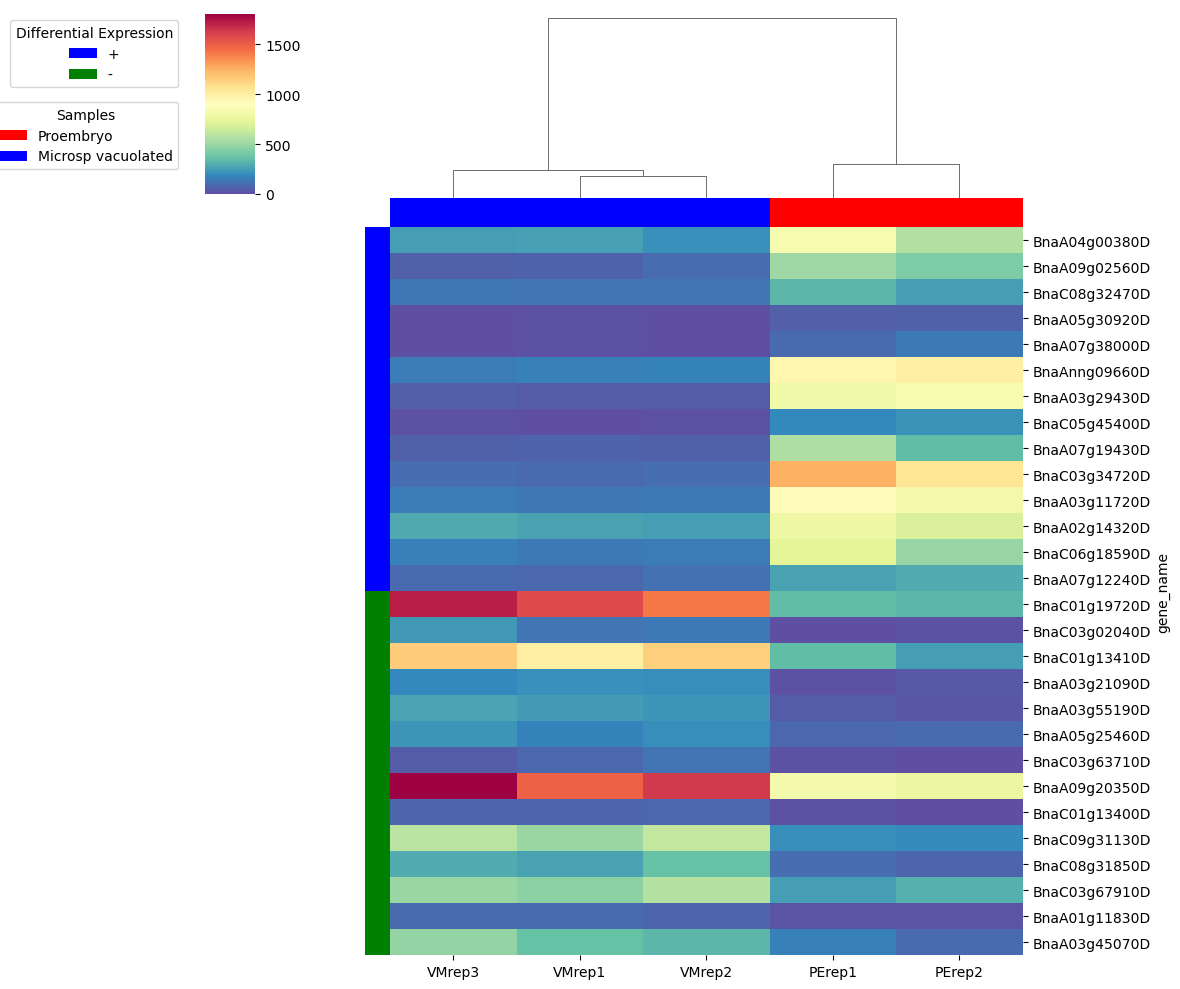

In [342]:
ATG_DEG = pd.concat((df_ATG_up, df_ATG_down), axis=0)
plt.figure()

# Specifying gene name in the ATG dataframe index
ATG_DEG.set_index('gene_name', inplace=True)

# Perform clustering and plotting by TM normalized values (edgeR result???????)
sns.clustermap(ATG_DEG[['PErep1', 'PErep2', 'VMrep1', 'VMrep2', 'VMrep3']], 
               cmap='Spectral_r', 
               col_colors=col_colors, 
               row_colors=row_colors, 
               yticklabels=True,
               row_cluster=False)

# Setting legend handles and plotting legend
from matplotlib.patches import Patch

handles_sample = [Patch(facecolor=lut[name]) for name in lut]
handles_signal = [Patch(facecolor=lut_s[name]) for name in lut_s]

legend1 = plt.legend(handles_sample, lut, title='Samples', bbox_to_anchor=(-0.4, 0.1), loc='lower right')
plt.legend(handles_signal, lut_s, title='Differential Expression',
           bbox_to_anchor=(0, 0.90), bbox_transform=plt.gcf().transFigure, loc='lower right')

plt.gca().add_artist(legend1)

plt.savefig('./analyses-Novogene/data/MVvsPE/ATG_DEG_TM.svg', bbox_inches='tight')
plt.show()


In [345]:
df_ATG_up = pd.merge(df_tomerge, df_up, how='inner').sort_values('log2FoldChange', ascending=False)

columnsdisplayed = ['gene_name', 'gene_description','PErep1', 'PErep2', 'PErep3', 'VMrep2', 'VMrep3', 'log2FoldChange', 'pvalue', 'padj', 'gene_chr']
df_ATG_up[columnsdisplayed][df_ATG_up['gene_description']!='-']

,gene_name,gene_description,PErep1,PErep2,PErep3,VMrep2,VMrep3,log2FoldChange,pvalue,padj,gene_chr
9,BnaA07g38000D,Autophagy-related protein [Source:UniProtKB/Tr...,88.357743,138.566592,20.235610,3.400182,2.184962,3.790826,0.000143,0.000768,LK033471
10,BnaC03g34720D,Autophagy-related protein [Source:UniProtKB/Tr...,1247.282563,1047.271717,73.354086,98.605270,101.964884,3.022528,0.001408,0.005561,LK031982
8,BnaA05g30920D,Autophagy-related protein [Source:UniProtKB/Tr...,55.480443,62.719615,16.019858,4.760254,5.826565,2.900961,0.000110,0.000610,LK032162
13,BnaA09g02560D,BnaA09g02560D protein [Source:UniProtKB/TrEMBL...,511.652979,428.827138,160.198579,92.484943,61.178930,2.320165,0.000054,0.000327,LK032102
4,BnaAnng09660D,BnaAnng09660D protein [Source:UniProtKB/TrEMBL...,955.496526,996.220867,271.494434,165.248833,147.120761,2.229644,0.000202,0.001042,LK032769
1,BnaA03g11720D,BnaA03g11720D protein [Source:UniProtKB/TrEMBL...,924.674058,806.603425,110.452705,136.687306,147.120761,2.141863,0.007491,0.022647,LK032543
5,BnaC06g18590D,BnaC06g18590D protein [Source:UniProtKB/TrEMBL...,723.300596,490.088157,149.237624,142.807633,157.317250,1.631476,0.012201,0.033995,LK032168
12,BnaA02g14320D,BnaA02g14320D protein [Source:UniProtKB/TrEMBL...,776.726209,685.539982,327.985512,246.853194,286.958316,1.166097,0.010284,0.029510,LK032578


In [346]:
df_ATG_down = pd.merge(df_tomerge, df_down, how='inner').sort_values('log2FoldChange')

columnsdisplayed = ['gene_name', 'gene_description','PErep1', 'PErep2', 'PErep3', 'VMrep2', 'VMrep3', 'log2FoldChange', 'pvalue', 'padj', 'gene_chr']
df_ATG_down[columnsdisplayed][df_ATG_down['gene_description']!='-']

,gene_name,gene_description,PErep1,PErep2,PErep3,VMrep2,VMrep3,log2FoldChange,pvalue,padj,gene_chr
12,BnaC03g63710D,Autophagy-related protein [Source:UniProtKB/Tr...,8.219325,0.000000,0.000000,116.286216,45.155877,-5.141774,1.254123e-04,6.860867e-04,LK032272
2,BnaA03g55190D,BnaA03g55190D protein [Source:UniProtKB/TrEMBL...,45.206287,24.796127,5.058903,224.411995,273.120225,-3.339196,1.758994e-05,1.207504e-04,LK033059
11,BnaC01g19720D,Autophagy-related protein [Source:UniProtKB/Tr...,351.376142,326.725438,360.868378,1413.795568,1712.281730,-2.175813,1.577538e-21,2.424206e-19,LK032473
4,BnaC09g31130D,BnaC09g31130D protein [Source:UniProtKB/TrEMBL...,199.318630,191.076037,56.491078,615.432895,587.026403,-1.934793,9.960045e-04,4.132112e-03,LK032717
8,BnaA09g20350D,Autophagy-related protein [Source:UniProtKB/Tr...,809.603508,764.304150,485.654640,1625.966908,1801.865164,-1.255765,2.355846e-04,1.187838e-03,LK032066
1,BnaC03g67910D,BnaC03g67910D protein [Source:UniProtKB/TrEMBL...,248.634580,307.763694,186.336242,571.910569,494.529687,-1.043438,2.016809e-03,7.549253e-03,LK032376


In [233]:
colsave = df_ATG_up.columns.tolist()
colsave.pop(-1)

'VMrep3_fpkm'

In [ ]:
df_ATG_up[colsave].to_csv('./analyses-Novogene/data/ATG_genes_UP', index=False)
df_ATG_down[colsave].to_csv('./analyses-Novogene/ATG_genes_DOWN', index=False)

### 2. ROS genes

merging OS genes with DEG results.

In [236]:
df_tomerge = pd.DataFrame()
df_tomerge['gene_id'] = df_os['gene_id']

reading up and down regulated genes and merging them with ATG genes in _Brassica napus_ reported in literature, preserving the sorted log2FoldChange order

In [237]:
df_OS_up = df_up.merge(df_tomerge, how='inner')

In [238]:
df_OS_down = df_down.merge(df_tomerge, how='inner')

Adding type of fold change

In [239]:
df_OS_up['signal']=['+' for i in range(df_OS_up.shape[0])]
df_OS_down['signal']=['-' for i in range(df_OS_down.shape[0])]

merging both dataframes

In [240]:
OS_DEG = pd.concat((df_OS_up, df_OS_down), axis=0)

making a colordict mapping treatments across samples

In [241]:
lut = dict(zip(["Proembryo", "Microsp vacuolated"], "rbg"))
lut


{'Proembryo': 'r', 'Microsp vacuolated': 'b'}

In [242]:
sample_order = ["Proembryo", "Proembryo", "Microsp vacuolated", "Microsp vacuolated", "Microsp vacuolated"]
col_colors = [*map(lut.get, sample_order)]

making a colordict mapping type of differential expression (UP:+, DOWN:-) across instances of DEG

In [243]:
lut_s = dict(zip(["+", "-"], ['b','g']))
lut_s

{'+': 'b', '-': 'g'}

In [244]:
row_signal = OS_DEG.signal.tolist()
row_colors = [*map(lut_s.get, row_signal)]

<Figure size 1000x10000 with 0 Axes>

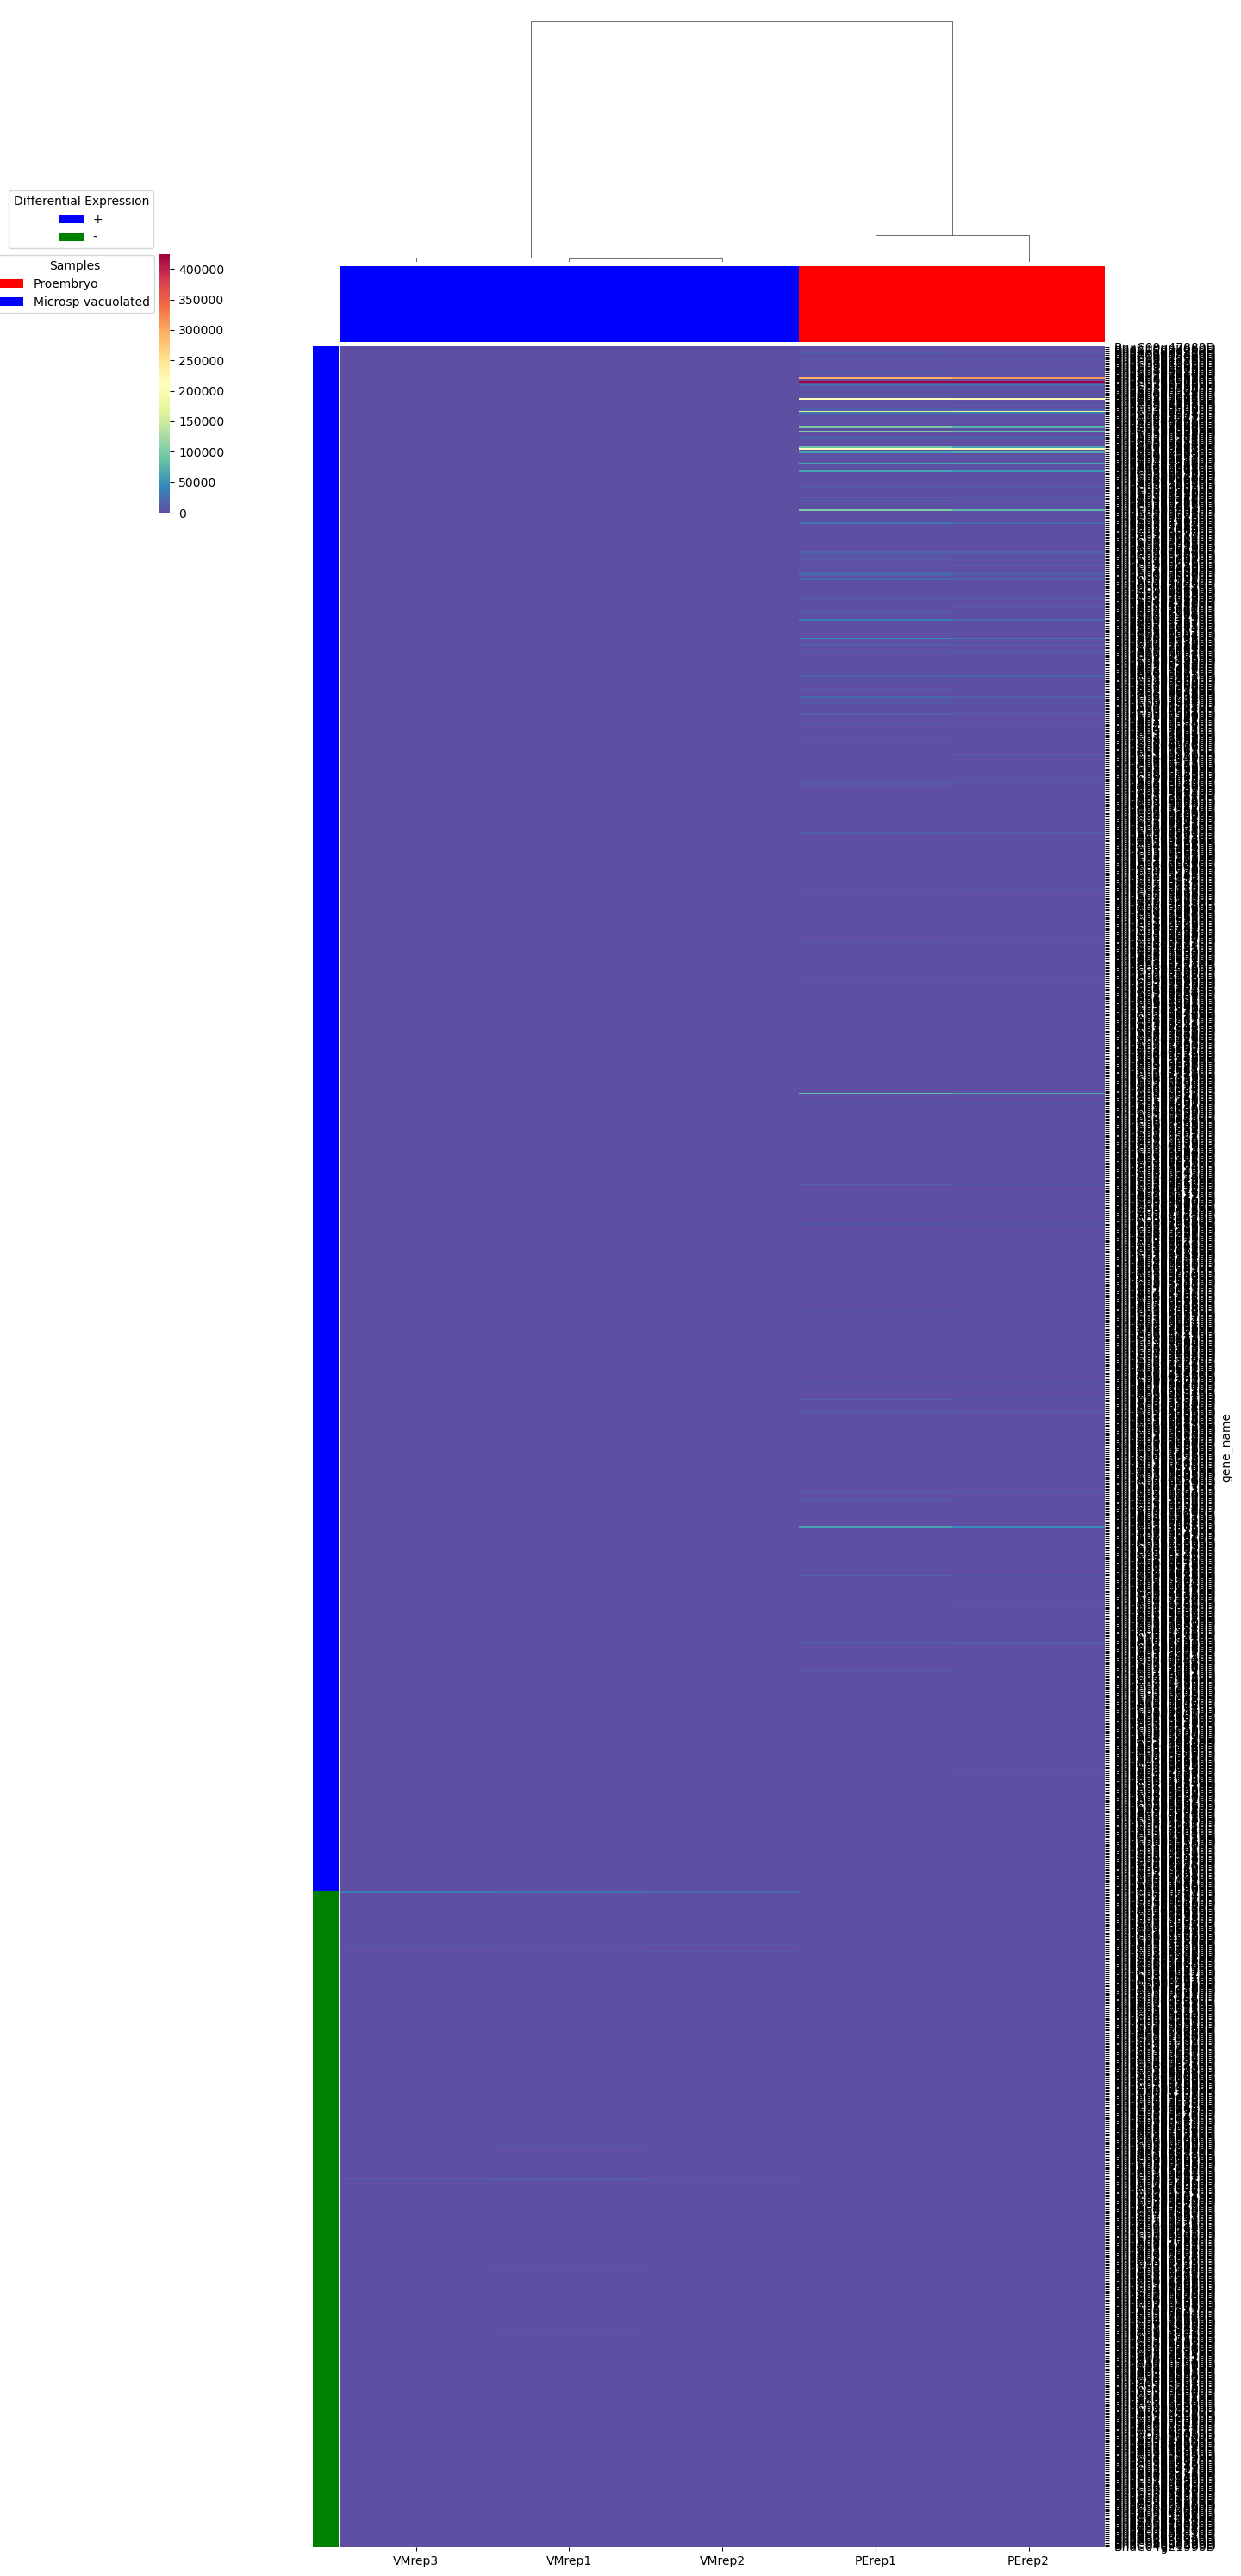

In [245]:
OS_DEG = pd.concat((df_OS_up, df_OS_down), axis=0)

plt.figure(figsize=(10,100))

# Specifying gene name in the ATG dataframe index
OS_DEG.set_index('gene_name', inplace=True)

# Perform clustering and plotting by TM normalized values (edgeR result???????)
sns.clustermap(OS_DEG[['PErep1', 'PErep2', 'VMrep1', 'VMrep2', 'VMrep3']], 
               cmap='Spectral_r', 
               col_colors=col_colors, 
               row_colors=row_colors, 
               cbar_pos=(-0.05,0.8,0.01,0.1),
               figsize=(12,30),dendrogram_ratio=0.1,
               yticklabels=True,
               row_cluster=False)

# Setting legend handles and plotting legend
from matplotlib.patches import Patch

handles_sample = [Patch(facecolor=lut[name]) for name in lut]
handles_signal = [Patch(facecolor=lut_s[name]) for name in lut_s]

legend1 = plt.legend(handles_sample, lut, title='Samples', bbox_to_anchor=(0.05, 0.75), loc='lower right')

plt.legend(handles_signal, lut_s, title='Differential Expression', bbox_to_anchor=(-0.05, 0.90), bbox_transform=plt.gcf().transFigure, loc='lower right')

plt.gca().add_artist(legend1)

plt.savefig('./analyses-Novogene/data/MVvsPE/OS_DEG_TM.svg', bbox_inches='tight')
plt.show()


All up regulated

In [246]:
max_val = max(OS_DEG[['PErep1', 'PErep2', 'VMrep1', 'VMrep2', 'VMrep3']].max().tolist())

<Figure size 1000x10000 with 0 Axes>

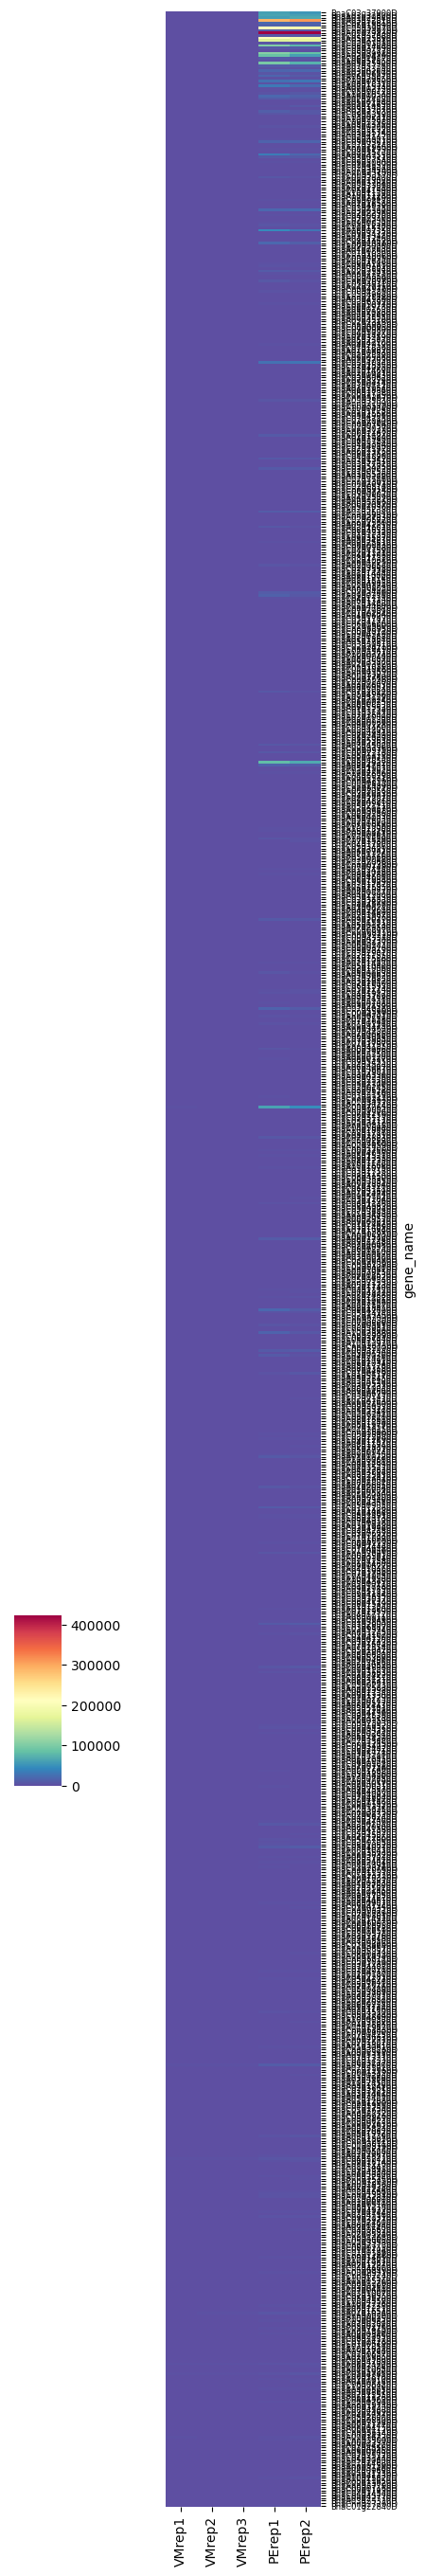

In [247]:
df_OS_up = df_up.merge(df_tomerge, how='inner').sort_values('log2FoldChange', ascending = False)
plt.figure(figsize=(10,100))

# Specifying gene name in the ATG dataframe index
df_OS_up.set_index('gene_name', inplace=True)

# Perform clustering and plotting by TM normalized values (edgeR result???????)
cm = sns.clustermap(df_OS_up[['PErep1', 'PErep2', 'VMrep1', 'VMrep2', 'VMrep3']], 
               cmap='Spectral_r',
               vmax= max_val,
               yticklabels=True,
               row_cluster=False)

# Change proportions of heatmap
hm = cm.ax_heatmap.get_position()
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), fontsize=6)
cm.ax_heatmap.set_position([hm.x0, hm.y0, hm.width*0.25, hm.height*3.5])
col = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*0.25, col.height*0.5])


cm.tick_params(axis='x', rotation=90)# Rotates X-Axis Ticks by 45-degrees

plt.savefig('./analyses-Novogene/data/MVvsPE/OS_DEG_TM_up.svg', bbox_inches='tight')
plt.show()

<Figure size 1000x10000 with 0 Axes>

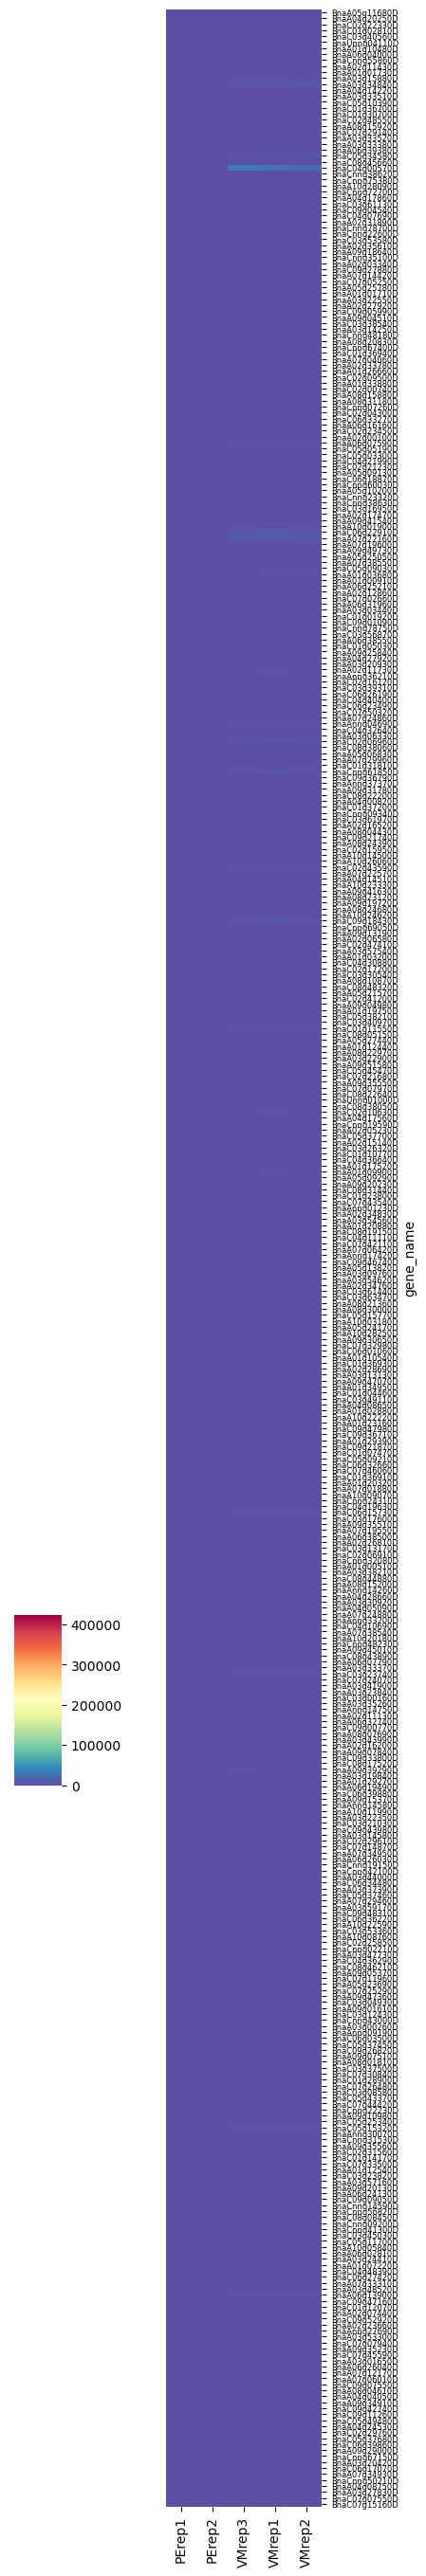

In [248]:
df_OS_down = df_down.merge(df_tomerge, how='inner').sort_values('log2FoldChange')
plt.figure(figsize=(10,100))

# Specifying gene name in the ATG dataframe index
df_OS_down.set_index('gene_name', inplace=True)

# Perform clustering and plotting by TM normalized values (edgeR result???????)
cm = sns.clustermap(df_OS_down[['PErep1', 'PErep2', 'VMrep1', 'VMrep2', 'VMrep3']], 
               cmap='Spectral_r',
               vmax=max_val,
               yticklabels=True,
               row_cluster=False)

# Change proportions of heatmap
hm = cm.ax_heatmap.get_position()
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), fontsize=6)
cm.ax_heatmap.set_position([hm.x0, hm.y0, hm.width*0.25, hm.height*3.5])
col = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*0.25, col.height*0.5])


cm.tick_params(axis='x', rotation=90)# Rotates X-Axis Ticks by 45-degrees

plt.savefig('./analyses-Novogene/data/MVvsPE/OS_DEG_TM_down.svg', bbox_inches='tight')
plt.show()

In [262]:
import re
UPREGULATED = df_ATG_up['gene_description'].tolist()
list_to_check = ['BnATG5', 'NBR1', 'CIB-123', 'CIB']
for i in UPREGULATED:
    for k in list_to_check:
        if re.search(k,i):
            print('found match for %s', i)

## 3. miRNA

merging ATG genes with DEG results.

In [318]:
df_tomerge = pd.DataFrame()
df_tomerge['gene_id'] = df_mirna['gene_id']

reading up and down regulated genes

In [328]:
df_mirna_up = df_up.merge(df_tomerge, how='inner')
#df_mirna_up = df_mirna_up.sort_values('log2FoldChange', ascending=False)

In [329]:
df_mirna_down = df_down.merge(df_tomerge, how='inner')
#df_mirna_down = df_mirna_down.sort_values('log2FoldChange')

Adding type of fold change

In [321]:
df_mirna_up['signal']=['+' for i in range(df_mirna_up.shape[0])]
df_mirna_down['signal']=['-' for i in range(df_mirna_down.shape[0])]

merging both dataframes

In [322]:
#ATG_DEG = pd.merge(df_tomerge, df_all, how='inner')
mirna_DEG = pd.concat((df_mirna_up, df_mirna_down), axis=0)

colordict for conditions

In [323]:
lut = dict(zip(["Proembryo", "Microsp vacuolated"], "rbg"))
lut


{'Proembryo': 'r', 'Microsp vacuolated': 'b'}

In [324]:
sample_order = ["Proembryo", "Proembryo", "Microsp vacuolated", "Microsp vacuolated", "Microsp vacuolated"]
col_colors = [*map(lut.get, sample_order)]

making a colordict mapping type of differential expression (UP:+, DOWN:-) across instances of DEG

In [325]:
lut_s = dict(zip(["+", "-"], ['b','g']))
lut_s

{'+': 'b', '-': 'g'}

In [326]:
row_signal = mirna_DEG.signal.tolist()
row_colors = [*map(lut_s.get, row_signal)]

<Figure size 640x480 with 0 Axes>

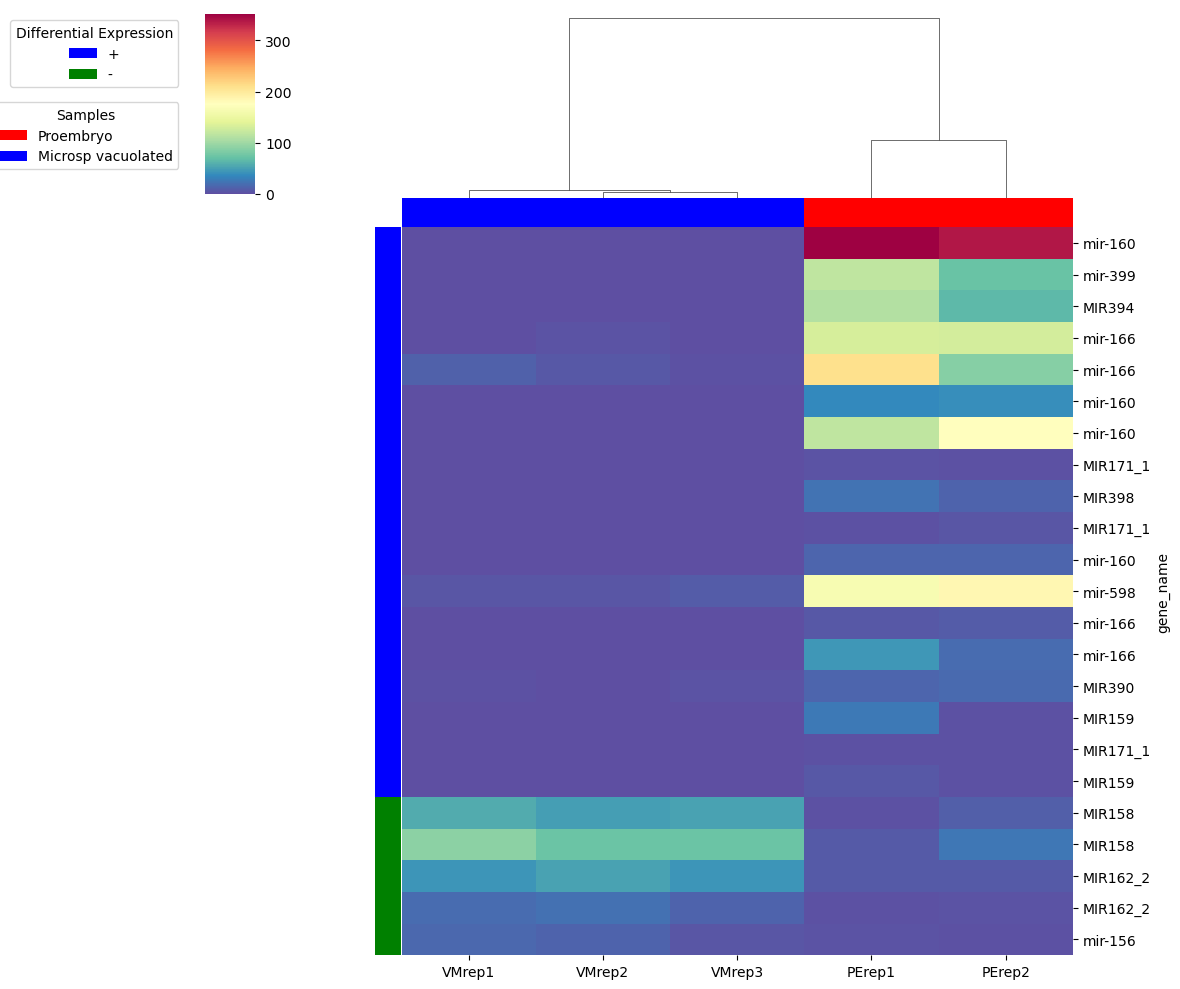

In [330]:
mirna_DEG = pd.concat((df_mirna_up, df_mirna_down), axis=0)
plt.figure()

# Specifying gene name in the ATG dataframe index
mirna_DEG.set_index('gene_name', inplace=True)

# Perform clustering and plotting by TM normalized values (edgeR result???????)
sns.clustermap(mirna_DEG[['PErep1', 'PErep2', 'VMrep1', 'VMrep2', 'VMrep3']], 
               cmap='Spectral_r', 
               col_colors=col_colors, 
               row_colors=row_colors,
               yticklabels=True,
               row_cluster=False)

# Setting legend handles and plotting legend
from matplotlib.patches import Patch

handles_sample = [Patch(facecolor=lut[name]) for name in lut]
handles_signal = [Patch(facecolor=lut_s[name]) for name in lut_s]

legend1 = plt.legend(handles_sample, lut, title='Samples', bbox_to_anchor=(-0.4, 0.1), loc='lower right')
plt.legend(handles_signal, lut_s, title='Differential Expression',
           bbox_to_anchor=(0, 0.90), bbox_transform=plt.gcf().transFigure, loc='lower right')

plt.gca().add_artist(legend1)

plt.savefig('./analyses-Novogene/data/MVvsPE/mirna_DEG_TM.svg', bbox_inches='tight')
plt.show()


### 3. novel genes (?)

In [8]:
df_novel_hypothetical = df_up[df_up['gene_biotype'] == '-']

KeyError: 'gene_biotype'

In [33]:
df_tomerge = pd.DataFrame()
df_tomerge['gene_id'] = df_novel_hypothetical['gene_id']

reading up and down regulated genes

In [34]:
df_novel_up = pd.merge(df_tomerge, df_up, how='inner')


In [ ]:
df_novel_hypothetical = df_down[df_down['gene_biotype'] == '-']

In [ ]:
df_novel_down = pd.merge(df_tomerge, df_down, how='inner')

Adding type of fold change

In [35]:
df_novel_up['signal']=['+' for i in range(df_novel_up.shape[0])]
df_novel_down['signal']=['-' for i in range(df_novel_down.shape[0])]

merging both dataframes

In [46]:
#ATG_DEG = pd.merge(df_tomerge, df_all, how='inner')
novel_DEG = pd.concat((df_novel_up, df_novel_down), axis=0)

#discretizar? no. volver a hacer protocolo con anotaciones nuevas :-( (?)

In [48]:
novel_DEG.describe()

,Trep1,Trep2,Trep3,Crep1,Crep2,Crep3,T,C,log2FoldChange,pvalue,...,Trep3_count,Crep1_count,Crep2_count,Crep3_count,Trep1_fpkm,Trep2_fpkm,Trep3_fpkm,Crep1_fpkm,Crep2_fpkm,Crep3_fpkm
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,9.100000e+02,...,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,212.224279,198.759119,235.829766,148.213924,138.809001,147.517011,215.604388,144.846646,2.210124,1.960033e-03,...,270.350549,142.139560,127.884615,133.914286,8.933149,8.247185,10.098400,5.306778,5.053752,5.296838
std,1042.652096,959.217425,1290.019392,773.894654,671.331130,762.273744,1090.586752,733.841669,3.764128,2.792092e-03,...,1478.852552,742.177541,618.496803,691.983542,50.874642,44.491441,65.205671,31.463587,28.055337,31.286672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.420552,8.755731e-194,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.370940,19.231508,18.318532,0.000000,0.000000,0.000000,21.552088,0.000000,-1.159669,6.373013e-06,...,21.000000,0.000000,0.000000,0.000000,1.026859,0.931289,0.973396,0.000000,0.000000,0.000000
50%,50.883190,44.617100,50.594040,21.897439,20.623052,20.929979,50.671690,23.023239,2.109950,3.515422e-04,...,58.000000,21.000000,19.000000,19.000000,2.204237,2.026199,1.986927,0.734311,0.789642,0.738779
75%,130.006550,116.735256,130.846654,86.547022,82.492206,81.241367,126.590382,80.262576,6.096571,3.198885e-03,...,150.000000,83.000000,76.000000,73.750000,4.405566,3.912909,4.292683,2.709858,2.664086,2.828891
max,17067.239525,16960.651945,21476.297549,17459.558358,13939.012014,17117.418234,17646.240760,16171.996202,9.726975,1.029176e-02,...,24620.000000,16744.000000,12842.000000,15539.000000,930.088280,717.586221,1245.868418,703.078696,561.309868,689.301061


making a colordict mapping treatments across samples

In [37]:
lut = dict(zip(["T", "C"], "rbg"))
lut


{'T': 'r', 'C': 'b'}

In [38]:
sample_order = ["T", "T", "T", "C", "C", "C"]
col_colors = [*map(lut.get, sample_order)]

making a colordict mapping type of differential expression (UP:+, DOWN:-) across instances of DEG

In [39]:
lut_s = dict(zip(["+", "-"], ['b','g']))
lut_s

{'+': 'b', '-': 'g'}

In [40]:
row_signal = novel_DEG.signal.tolist()
row_colors = [*map(lut_s.get, row_signal)]

<Figure size 640x480 with 0 Axes>

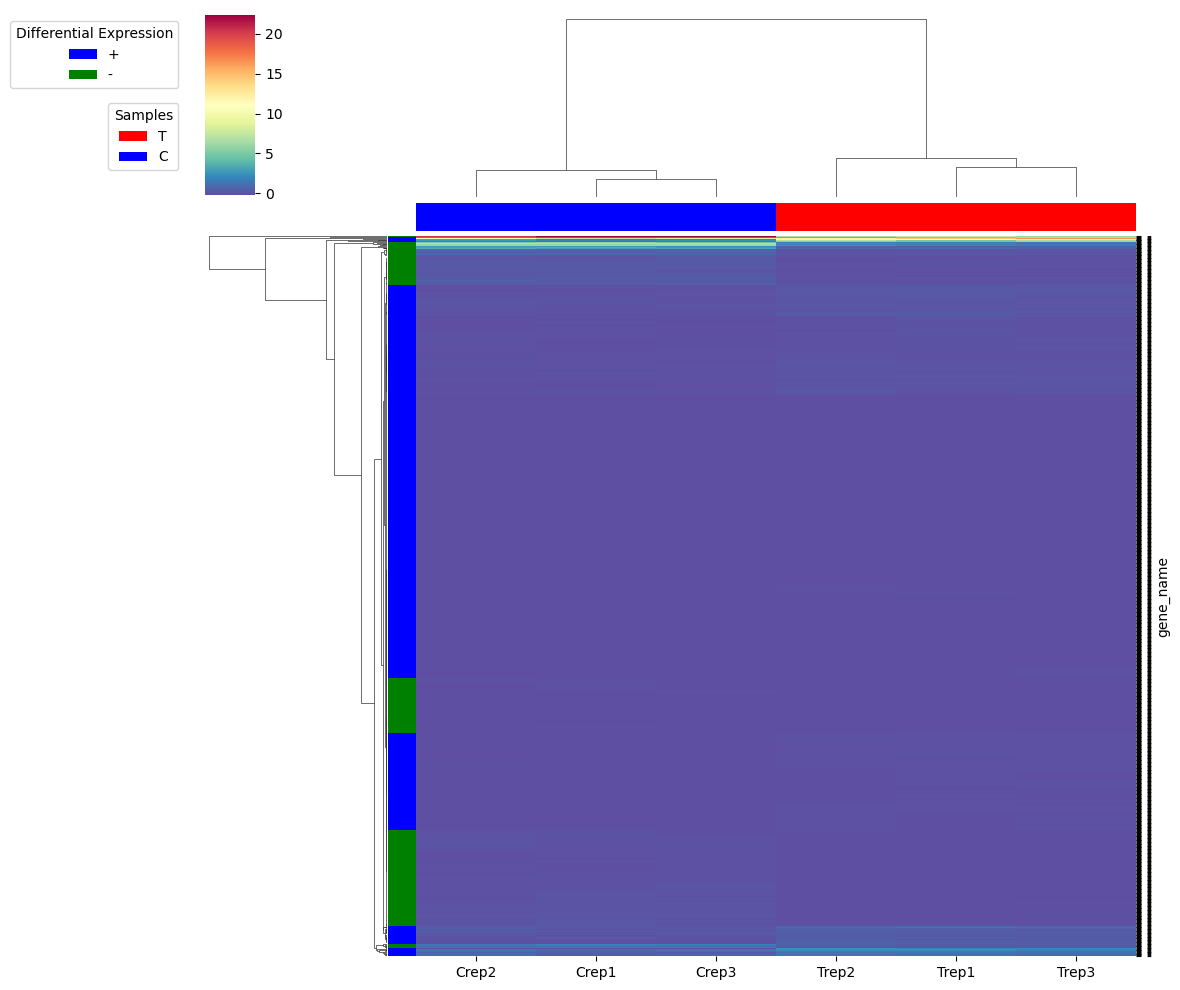

In [47]:
plt.figure()

# Specifying gene name in the ATG dataframe index
novel_DEG.set_index('gene_name', inplace=True)

# Perform clustering and plotting by TM normalized values (edgeR result???????)
sns.clustermap(novel_DEG[['Trep1', 'Trep2', 'Trep3', 'Crep1', 'Crep2', 'Crep3']], cmap='Spectral_r', col_colors=col_colors, row_colors=row_colors, yticklabels=True)

# Setting legend handles and plotting legend
from matplotlib.patches import Patch

handles_sample = [Patch(facecolor=lut[name]) for name in lut]
handles_signal = [Patch(facecolor=lut_s[name]) for name in lut_s]

legend1 = plt.legend(handles_sample, lut, title='Samples', bbox_to_anchor=(-0.4, 0.1), loc='lower right')
plt.legend(handles_signal, lut_s, title='Differential Expression',
           bbox_to_anchor=(0, 0.90), bbox_transform=plt.gcf().transFigure, loc='lower right')

plt.gca().add_artist(legend1)

plt.savefig('./novel_DEG_TM.svg')
plt.show()


merging OS genes with DEG results.

In [236]:
df_tomerge = pd.DataFrame()
df_tomerge['gene_id'] = df_os['gene_id']

Adding type of fold change

In [239]:
df_OS_up['signal']=['+' for i in range(df_OS_up.shape[0])]
df_OS_down['signal']=['-' for i in range(df_OS_down.shape[0])]

merging both dataframes

In [240]:
OS_DEG = pd.concat((df_OS_up, df_OS_down), axis=0)

making a colordict mapping treatments across samples

In [192]:
lut = dict(zip(["T", "C"], "rbg"))
lut


{'T': 'r', 'C': 'b'}

In [117]:
sample_order = ["T", "T", "T", "C", "C", "C"]
col_colors = [*map(lut.get, sample_order)]

making a colordict mapping type of differential expression (UP:+, DOWN:-) across instances of DEG

In [243]:
lut_s = dict(zip(["+", "-"], ['b','g']))
lut_s

{'+': 'b', '-': 'g'}

In [244]:
row_signal = OS_DEG.signal.tolist()
row_colors = [*map(lut_s.get, row_signal)]

<Figure size 1000x10000 with 0 Axes>

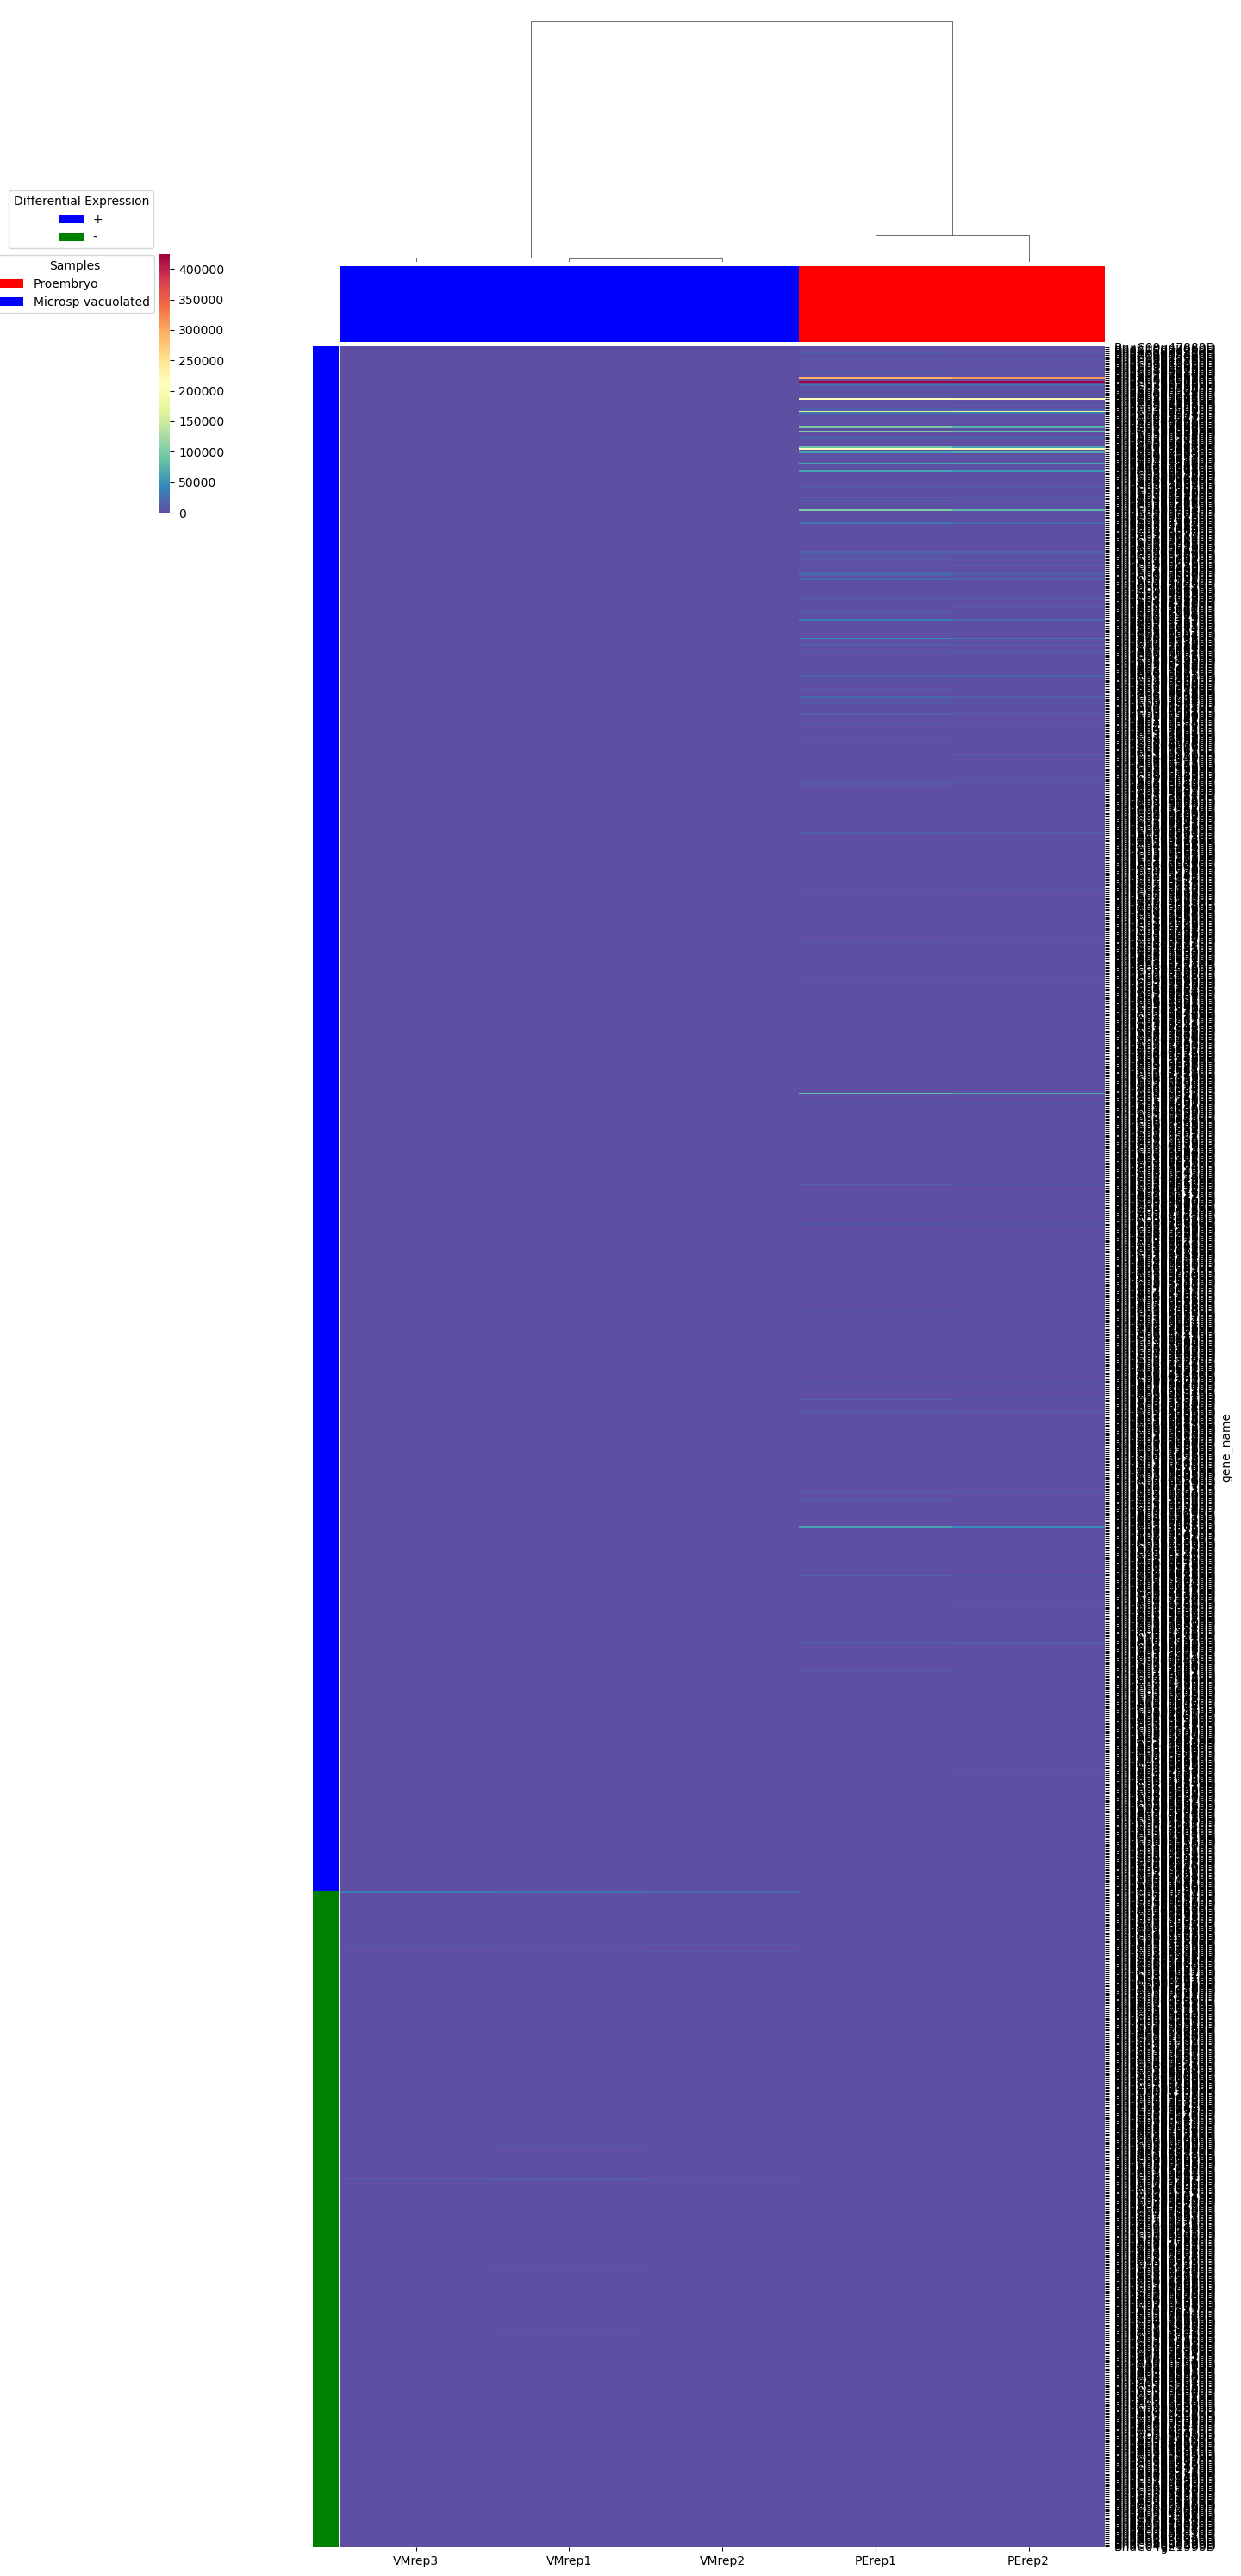

In [245]:
OS_DEG = pd.concat((df_OS_up, df_OS_down), axis=0)

plt.figure(figsize=(10,100))

# Specifying gene name in the ATG dataframe index
OS_DEG.set_index('gene_name', inplace=True)

# Perform clustering and plotting by TM normalized values (edgeR result???????)
sns.clustermap(OS_DEG[['PErep1', 'PErep2', 'VMrep1', 'VMrep2', 'VMrep3']], 
               cmap='Spectral_r', 
               col_colors=col_colors, 
               row_colors=row_colors, 
               cbar_pos=(-0.05,0.8,0.01,0.1),
               figsize=(12,30),dendrogram_ratio=0.1,
               yticklabels=True,
               row_cluster=False)

# Setting legend handles and plotting legend
from matplotlib.patches import Patch

handles_sample = [Patch(facecolor=lut[name]) for name in lut]
handles_signal = [Patch(facecolor=lut_s[name]) for name in lut_s]

legend1 = plt.legend(handles_sample, lut, title='Samples', bbox_to_anchor=(0.05, 0.75), loc='lower right')

plt.legend(handles_signal, lut_s, title='Differential Expression', bbox_to_anchor=(-0.05, 0.90), bbox_transform=plt.gcf().transFigure, loc='lower right')

plt.gca().add_artist(legend1)

plt.savefig('./analyses-Novogene/data/MVvsPE/OS_DEG_TM.svg', bbox_inches='tight')
plt.show()


In [30]:
columnsdisplayed = ['gene_name', 'gene_description','Trep1', 'Trep2', 'Trep3', 'Crep1', 'Crep2', 'Crep3', 'T', 'C', 'log2FoldChange', 'pvalue', 'padj', 'gene_chr']
df_ATG_up[columnsdisplayed]

,gene_name,gene_description,Trep1,Trep2,Trep3,Crep1,Crep2,Crep3,T,C,log2FoldChange,pvalue,padj,gene_chr
0,BnaC03g54750D,Fatty acyl-CoA reductase [Source:UniProtKB/TrE...,155.702561,70.002691,132.591277,49.008555,57.527460,61.688360,119.432176,56.074791,1.088186,7.825170e-03,4.016018e-02,LK031988
1,BnaC04g02910D,BnaC04g02910D protein [Source:UniProtKB/TrEMBL...,182.161820,43.078579,116.017367,22.940175,28.221018,15.422090,113.752588,22.194427,2.353874,2.200639e-05,2.802181e-04,LK032079
2,BnaC03g30230D,Cytochrome b6-f complex iron-sulfur subunit [S...,251.362958,122.312394,134.335899,10.427352,11.939661,0.000000,169.337083,7.455671,4.502501,1.503479e-05,2.011099e-04,LK032080
3,BnaC05g02530D,Malate dehydrogenase [Source:UniProtKB/TrEMBL;...,3981.100770,4417.092864,3347.057421,1674.632747,1747.532265,1652.366777,3915.083685,1691.510596,1.210858,3.428895e-23,4.190919e-21,LK032083
4,BnaC05g03040D,BnaC05g03040D protein [Source:UniProtKB/TrEMBL...,590.245002,627.716436,603.639232,160.581222,209.486787,139.900387,607.200224,169.989465,1.836926,1.867477e-21,2.028887e-19,LK032083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,BnaA03g37390D,Coniferaldehyde/sinapaldehyde dehydrogenase [S...,94.642733,62.310087,75.018749,0.000000,5.427119,12.117356,77.323856,5.848158,3.733578,1.322821e-06,2.283865e-05,LK031874
292,BnaC08g27800D,-,72.254130,45.386360,27.041642,5.213676,5.427119,18.726823,48.227377,9.789206,2.302008,5.508070e-03,3.047666e-02,LK031795
293,BnaA09g24180D,-,486.443295,396.169074,464.069468,129.299166,260.501704,134.392498,448.893946,174.731123,1.361078,1.281958e-07,2.701801e-06,LK031877
294,BnaC07g36420D,-,390.782898,336.936028,223.311624,74.034200,89.004749,66.094671,317.010183,76.377873,2.052422,3.321316e-13,1.589081e-11,LK031879


In [35]:
df_ATG_up.sort_values('padj')[['gene_id','gene_description','padj','log2FoldChange']]

,gene_id,gene_description,padj,log2FoldChange
10,GSBRNA2T00005302001,BnaAnng34630D protein (Fragment) [Source:UniPr...,6.338420e-91,4.777244
73,GSBRNA2T00042667001,BnaA06g37880D protein [Source:UniProtKB/TrEMBL...,2.570055e-88,3.692505
221,GSBRNA2T00119417001,-,8.024834e-78,3.296141
281,GSBRNA2T00149722001,-,2.842587e-76,3.097318
78,GSBRNA2T00043759001,BnaAnng19660D protein [Source:UniProtKB/TrEMBL...,5.681559e-72,2.585492
...,...,...,...,...
284,GSBRNA2T00151029001,-,4.660560e-02,5.336258
66,GSBRNA2T00037324001,BnaC04g50270D protein [Source:UniProtKB/TrEMBL...,4.688723e-02,1.207197
27,GSBRNA2T00016842001,Peroxidase [Source:UniProtKB/TrEMBL;Acc:A0A078...,4.920544e-02,6.286598
110,GSBRNA2T00062654001,"Ferredoxin-thioredoxin reductase, catalytic ch...",4.962613e-02,2.008088
